## gl-pgp-aiml-uta-intl-may20-AnthonyDjemah

Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include 
(name, meaning, range of values observed, central values (mean and median), standard deviation and 
 quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and 
 missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from 
 the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in 
 terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and 
 pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from 
 the plots

### Importing Libraries

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [62]:
#Load data
TDS_df = pd.read_csv('C:\\Users\\garrettikekhua\\Downloads\\PGD-AIML\\Program Content\\Ensemble Techniques\\Project Ensemble Techniques - Term Deposit Subscription Prediction\\bank-full.csv')

In [63]:
TDS_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [64]:
TDS_df.shape

(45211, 17)

In [65]:
TDS_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [98]:
#These Columns are not important so, we will drop them
TDS_df_nw1 = TDS_df.drop(['contact','month','day','duration','pdays'], axis=1)

In [67]:
TDS_df_nw1.head()

,age,job,marital,education,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,0,unknown,no


In [69]:
TDS_df_nw1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [10]:
#Lets convert the columns with an 'object' datatype into categorical variables

In [99]:
for feature in TDS_df_nw1.columns: # Loop through all columns in the dataframe
    if TDS_df_nw1[feature].dtype == 'object': # Only apply for columns with categorical strings
        TDS_df_nw1[feature] = pd.Categorical(TDS_df_nw1[feature])# Replace strings with an integer


In [72]:
TDS_df_nw1.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
campaign        int64
previous        int64
poutcome     category
Target       category
dtype: object

In [73]:
# Value count for each column

print(TDS_df_nw1.age.value_counts())
print(TDS_df_nw1.job.value_counts())
print(TDS_df_nw1.marital.value_counts())
print(TDS_df_nw1.education.value_counts())
print(TDS_df_nw1.default.value_counts())
print(TDS_df_nw1.balance.value_counts())
print(TDS_df_nw1.housing.value_counts())
print(TDS_df_nw1.loan.value_counts())
print(TDS_df_nw1.campaign.value_counts())
print(TDS_df_nw1.previous.value_counts())
print(TDS_df_nw1.poutcome.value_counts())
print(TDS_df_nw1.Target.value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
1     17544


In [100]:
#We will convert all Categorical variables to "int"

replaceStruct = {
                "job": {"unknown": -1, "blue-collar": 1 ,"management": 2 ,"technician":3, "admin.": 4,"services": 5, "retired": 6, "self-employed": 7, "unemployed": 8, "housemaid": 9, "student": 10, "entrepreneur": 11},
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                 "poutcome": {"failure": 1, "success":2 , "other": 3, "unknown": -1},
                 "Target": {"no": 0, "yes": 1 }
                    }
oneHotCols=["marital","housing","default","loan"]


TDS_df_nw1=TDS_df_nw1.replace(replaceStruct)
TDS_df_nw1=pd.get_dummies(TDS_df_nw1, columns=oneHotCols)
TDS_df_nw1.head()


,age,job,education,balance,campaign,previous,poutcome,Target,marital_divorced,marital_married,marital_single,housing_no,housing_yes,default_no,default_yes,loan_no,loan_yes
0,58,2,3,2143,1,0,-1,0,0,1,0,0,1,1,0,1,0
1,44,3,2,29,1,0,-1,0,0,0,1,0,1,1,0,1,0
2,33,11,2,2,1,0,-1,0,0,1,0,0,1,1,0,0,1
3,47,1,-1,1506,1,0,-1,0,0,1,0,0,1,1,0,1,0
4,33,-1,-1,1,1,0,-1,0,0,0,1,1,0,1,0,1,0


In [75]:
TDS_df_nw1.dtypes

age                 int64
job                 int64
education           int64
balance             int64
campaign            int64
previous            int64
poutcome            int64
Target              int64
marital_divorced    uint8
marital_married     uint8
marital_single      uint8
housing_no          uint8
housing_yes         uint8
default_no          uint8
default_yes         uint8
loan_no             uint8
loan_yes            uint8
dtype: object

In [77]:
#Using univariate analysis check the individual attributes for their basic statistic such as central 
#values, spread, tails etc.
#What are your observations (any two attributes).

In [ ]:
#plot the graphs of different variable to see the distributions.

#import matplotlib.pyplot as plt
#import seaborn as sns

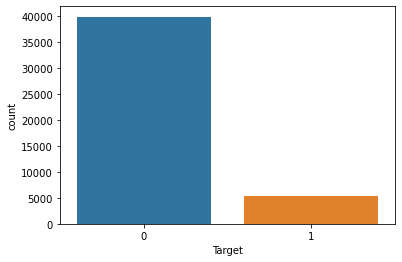

In [78]:
sns.countplot(TDS_df_nw1['Target'])

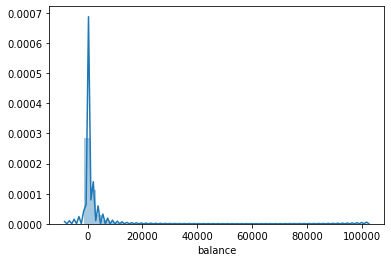

In [79]:
sns.distplot(TDS_df_nw1['balance'])

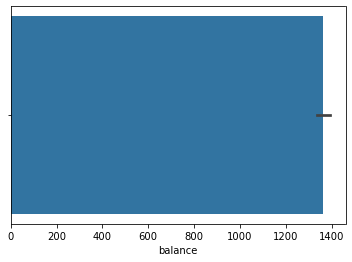

In [80]:
sns.barplot(TDS_df_nw1['balance'])

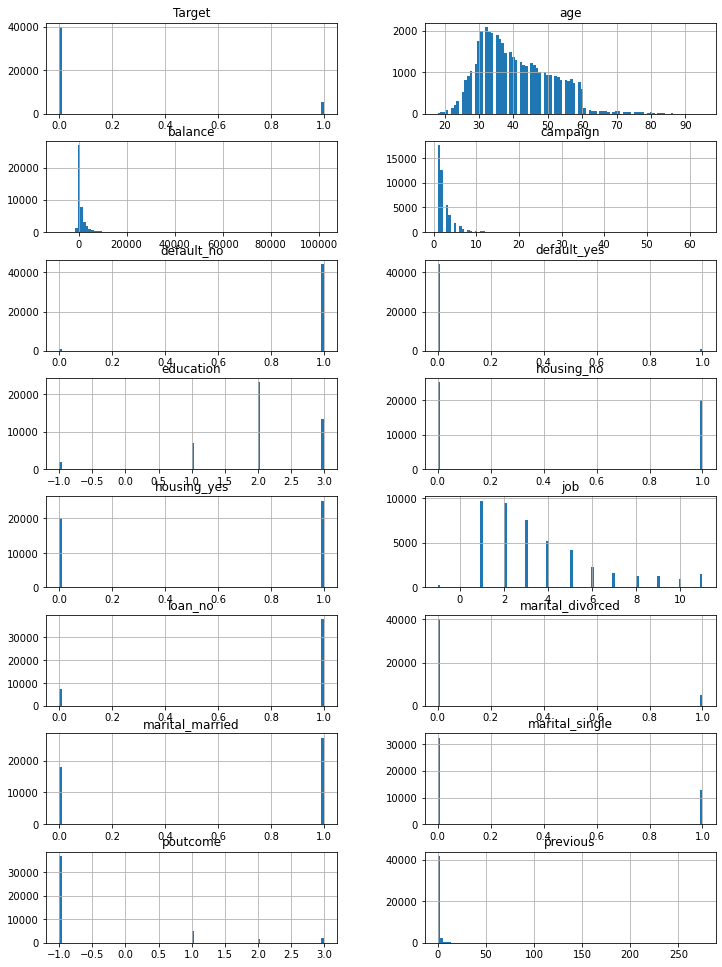

In [81]:
# Histogram of the 16 columns

columns = list(TDS_df_nw1)[0:16] # Excluding Outcome column which has only 
TDS_df_nw1[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [ ]:
Use correlation method to observe the relationship between different variables and state your insights.¶
Hint: Use seaborn plot and check the relationship between different variables

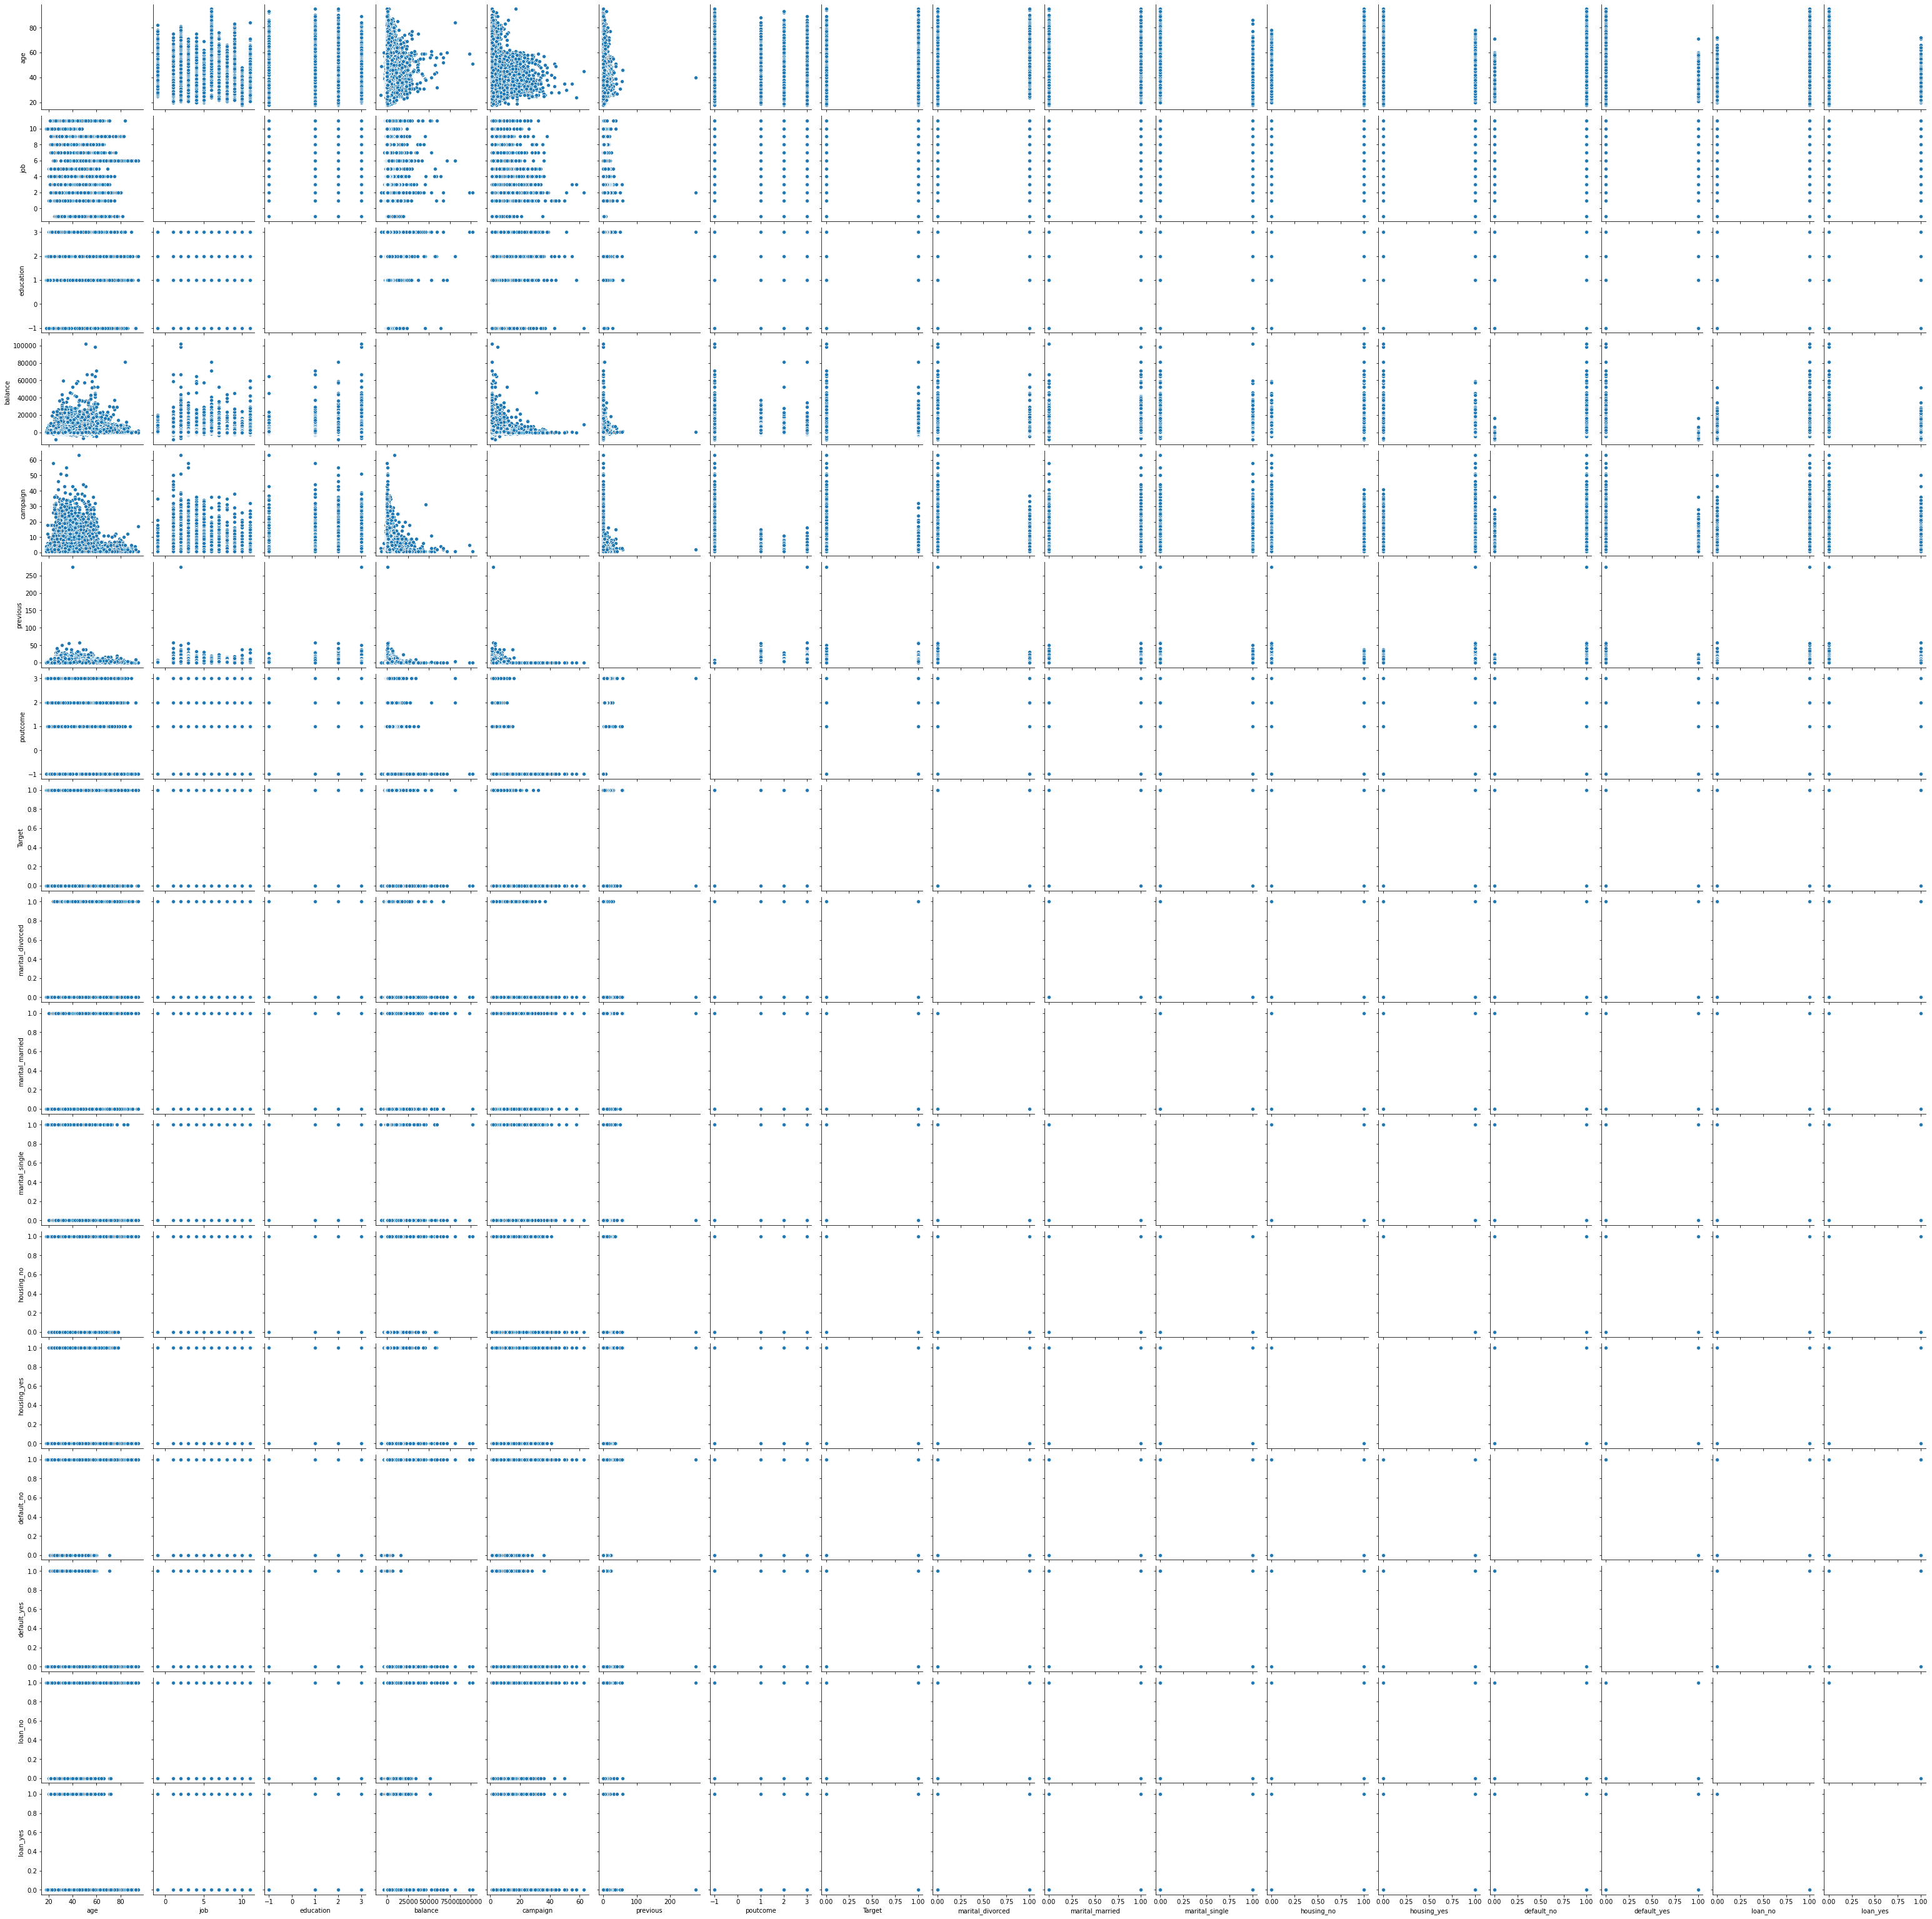

In [59]:
sns.pairplot(TDS_df_nw1,diag_kind='1')

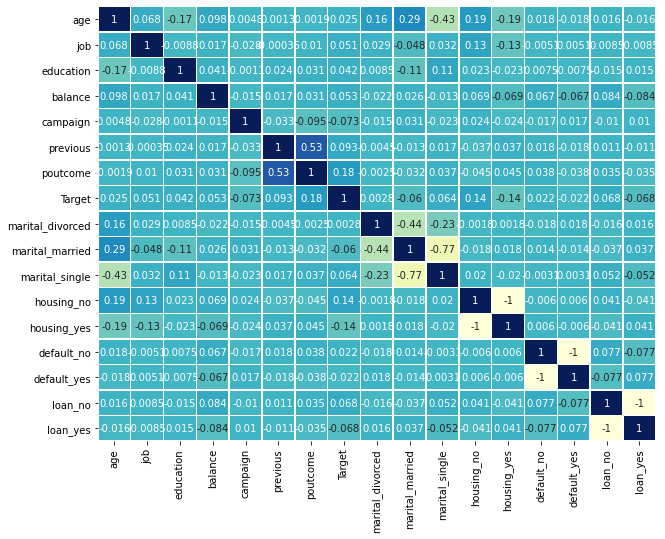

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(TDS_df_nw1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [ ]:
#Variables are not closely related

## Deliverable – 2 (Prepare the data for analytics)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

In [82]:
TDS_df_nw1.info()  # All values are of type 'int'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               45211 non-null  int64
 1   job               45211 non-null  int64
 2   education         45211 non-null  int64
 3   balance           45211 non-null  int64
 4   campaign          45211 non-null  int64
 5   previous          45211 non-null  int64
 6   poutcome          45211 non-null  int64
 7   Target            45211 non-null  int64
 8   marital_divorced  45211 non-null  uint8
 9   marital_married   45211 non-null  uint8
 10  marital_single    45211 non-null  uint8
 11  housing_no        45211 non-null  uint8
 12  housing_yes       45211 non-null  uint8
 13  default_no        45211 non-null  uint8
 14  default_yes       45211 non-null  uint8
 15  loan_no           45211 non-null  uint8
 16  loan_yes          45211 non-null  uint8
dtypes: int64(8), uint8(9)
memory us

In [ ]:
#Split Data

In [101]:
X = TDS_df_nw1.drop("Target" , axis=1)
y = TDS_df_nw1.pop("Target")

In [102]:
# splitting data into training and test set for independent attributes
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=15)
X_train.shape,X_test.shape

((31647, 16), (13564, 16))

In [103]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(TDS_df_nw1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(TDS_df_nw1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model 
performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. 
Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different 
matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (5 marks)

In [ ]:
#1. First create models using Logistic Regression and Decision Tree algorithm.

In [105]:
#from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
#from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear", random_state=15)
logreg.fit(X_train, y_train)


coef_df = pd.DataFrame(logreg.coef_)
coef_df['intercept'] = logreg.intercept_
print(coef_df)

         0        1         2         3         4         5         6  \
0  0.00413  0.02678  0.098908  0.000025 -0.118046  0.003806  0.396823   

          7         8         9        10        11        12        13  \
0 -0.224672 -0.465923 -0.059976  0.040834 -0.791406 -0.539424 -0.211148   

         14        15  intercept  
0 -0.075688 -0.674884  -0.750572  


In [106]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8804626030903403

Testing accuracy 0.8856531996461221

Confusion Matrix


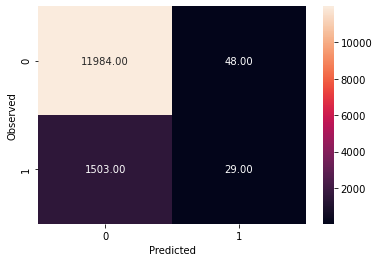

None

Recall: 0.018929503916449087

Precision: 0.37662337662337664

F1 Score: 0.036047234307022995

Roc Auc Score: 0.5074700711071606


In [107]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [108]:
y_predict = logreg.predict(X_test)

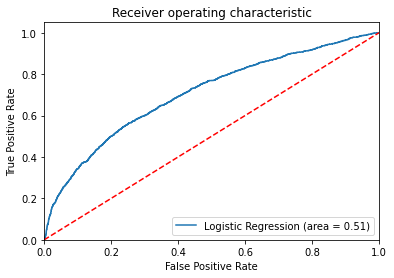

In [109]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Build Decision Tree Model

In [ ]:
#GINI

In [110]:
# We will build our model using the DecisionTreeClassifier function with the 'gini' method of split 


TDS_tree_gini = DecisionTreeClassifier(criterion = 'gini', random_state=15)
TDS_tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')

In [111]:
print("Train: %.2f" % TDS_tree_gini.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % TDS_tree_gini.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.82


In [ ]:
#There sames to be low degree of overfitting in the model so, the test accuracy about 82%.
#But we will Prune to try and improve it.


In [112]:
TDS_pruned = DecisionTreeClassifier(criterion = "gini", max_depth=4)
TDS_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [113]:
print("Train: %.2f" % TDS_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % TDS_pruned.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.90


In [ ]:
With a max_depth of 4 we have better test of 90%

In [122]:
preds_train = TDS_pruned.predict(X_train)
preds_test = TDS_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [123]:
# Confusion matrix
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,11883,149
1,1261,271


0.8960483633146564


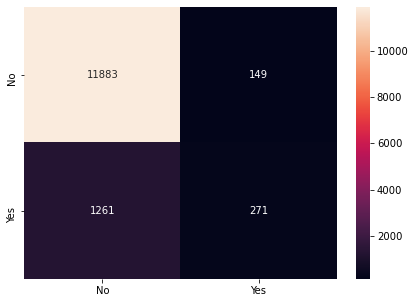

In [124]:
print(TDS_pruned.score(X_test , y_test))
y_predict = TDS_pruned.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [134]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048


In [ ]:
#Logistic Regression has on Test : 0.88
#Decision Tree has on Test       : 0.90  

In [ ]:
2. Build the ensemble models (Bagging and Boosting)

In [ ]:
Apply the Random forest model and print the accuracy of Random forest Model

In [131]:
from sklearn.ensemble import RandomForestClassifier
TDS_rfcl = RandomForestClassifier(n_estimators = 50)
TDS_rfcl = TDS_rfcl.fit(X_train, y_train)

In [132]:
pred_RF = TDS_rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

0.8864641698613979


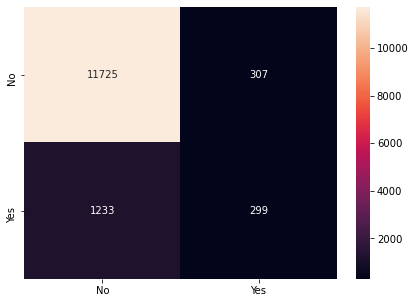

In [136]:
y_predict = TDS_rfcl.predict(X_test)
print(TDS_rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [137]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048
0,Random Forest,0.886464
0,Random Forest,0.886464


In [ ]:
#Apply Bagging Classifier Algorithm and print the accuracy.

In [138]:
from sklearn.ensemble import BaggingClassifier

TDS_bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
TDS_bgcl = TDS_bgcl.fit(X_train, y_train)

In [140]:
pred_BG = TDS_bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

0.8904452963727514


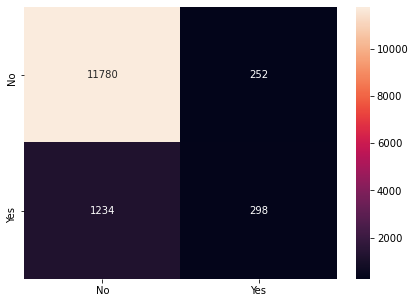

In [141]:
y_predict = TDS_bgcl.predict(X_test)

print(TDS_bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [142]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048
0,Random Forest,0.886464
0,Random Forest,0.886464
0,Bagging,0.890445


In [ ]:
Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [143]:
from sklearn.ensemble import AdaBoostClassifier
TDS_abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
TDS_abcl = TDS_abcl.fit(X_train, y_train)

In [144]:
pred_AB =TDS_abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

0.8899292244175759


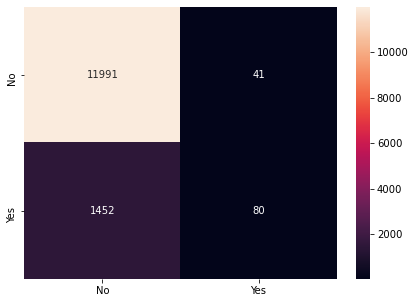

In [148]:
y_predict = TDS_abcl.predict(X_test)
print(TDS_abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [145]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048
0,Random Forest,0.886464
0,Random Forest,0.886464
0,Bagging,0.890445
0,Adaboost,0.889929


In [ ]:
Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
TDS_gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
TDS_gbcl = TDS_gbcl.fit(X_train, y_train)

In [150]:
pred_GB = TDS_gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

0.8957534650545562


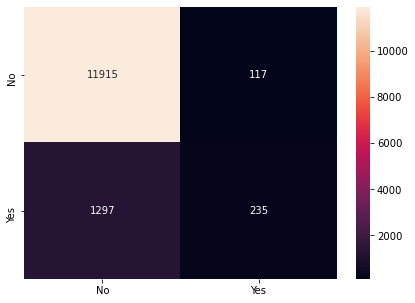

In [151]:
y_predict = TDS_gbcl.predict(X_test)
print(TDS_gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [152]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048
0,Random Forest,0.886464
0,Random Forest,0.886464
0,Bagging,0.890445
0,Adaboost,0.889929
0,Gradient Boost,0.895753


In [ ]:
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (5 marks)

In [153]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.896048
0,Random Forest,0.886464
0,Random Forest,0.886464
0,Bagging,0.890445
0,Adaboost,0.889929
0,Gradient Boost,0.895753
0,Gradient Boost,0.895753


In [ ]:
#For this dataset, Decision Tree and Gradient Boost models give the best results on test predictions

# THE END